In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Read the CSV file
df = pd.read_csv('project step 2.csv')

# Assuming 'PRICE' is the target variable
target_variable = 'PRICE'

# Extract features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM Regressor
lgbm_regressor = LGBMRegressor(n_estimators=100, random_state=42)

# Fit the model
lgbm_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = lgbm_regressor.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmsle = np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))

# Print the results
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Relative Absolute Error (RAE): {:.2f}".format(rae))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("Root Mean Squared Logarithmic Error (RMSLE): {:.2f}".format(rmsle))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 5618, number of used features: 27
[LightGBM] [Info] Start training from score 88623.193129
Root Mean Squared Error (RMSE): 21389.61
Relative Absolute Error (RAE): 11087.42
Mean Absolute Percentage Error (MAPE): 2021.96%
Root Mean Squared Logarithmic Error (RMSLE): 1.20


C:\Users\theam\AppData\Local\Temp\ipykernel_11512\3591373865.py:33: RuntimeWarning: invalid value encountered in log1p
  rmsle = np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))


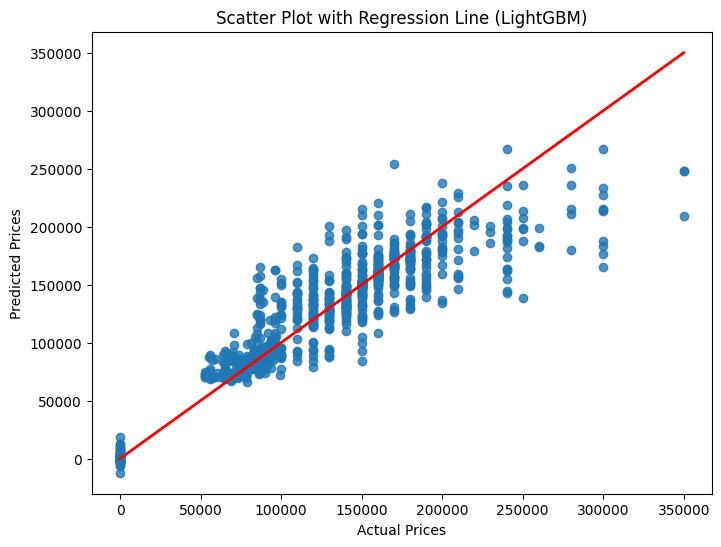

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8)  # Plot actual vs. predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Add regression line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot with Regression Line (LightGBM)")
plt.show()


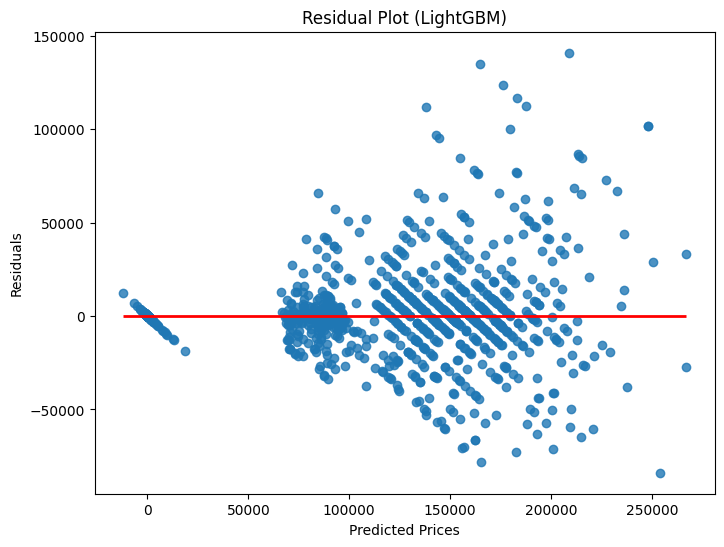

In [7]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.8)  # Plot residuals vs. predicted values
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (LightGBM)")
plt.hlines(0, y_pred.min(), y_pred.max(), color='red', linewidth=2)  # Add horizontal line at zero
plt.show()


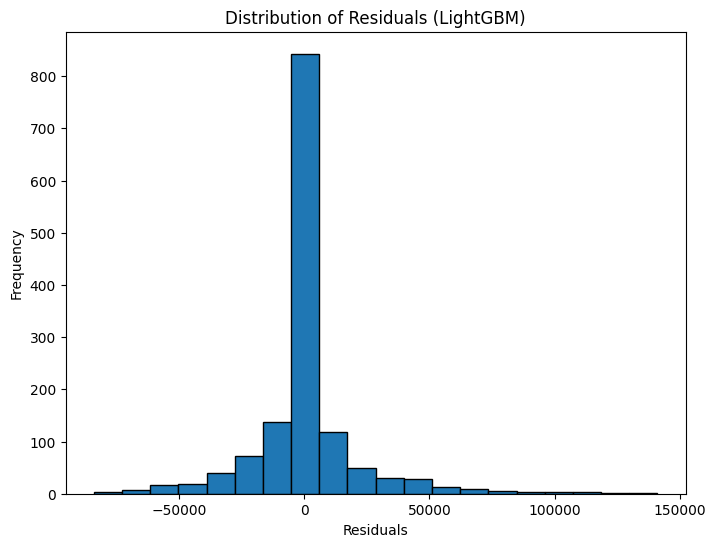

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')  # Plot histogram of residuals
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals (LightGBM)")
plt.show()


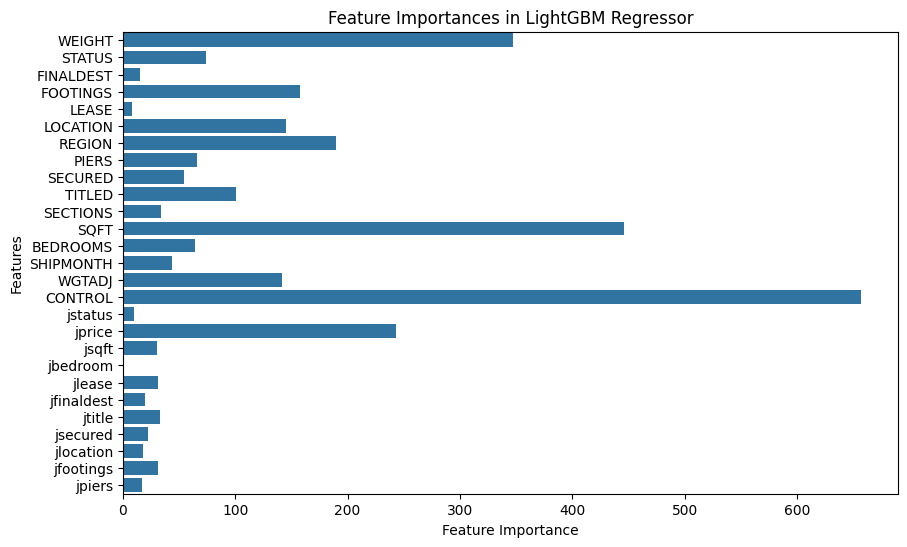

In [9]:
import seaborn as sns

importances = lgbm_regressor.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in LightGBM Regressor")
plt.show()
